# Gas - Dynamic Data

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Download the data

In [2]:
dataset = [i.strip().split() for i in open("Data/batch7.dat").readlines()]
#dataset

In [3]:
for i in range(0,len(dataset)):
    #dataset[i] = dataset[i][1:]
    dataset[i] = dataset[i][0].split(';') + [float(element.split(':')[1]) for element in dataset[i][1:]]
    dataset[i] = list(dataset[i])

In [4]:
df = pd.DataFrame(dataset)
df.rename(columns = {0:'Gas', 1:'concentration'}, inplace = True)
df

,Gas,concentration,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,1,100.000000,73159.5410,8.054461,23.419016,37.318524,52.926152,-16.180036,-23.392268,-66.052714,...,-11.841008,-22.535339,23306.0478,4.921790,10.453345,26.869293,33.342973,-6.191215,-9.830712,-18.115832
1,1,10.000000,17214.4062,3.066851,8.694492,16.053404,22.050849,-3.082581,-9.347596,-19.005447,...,-2.536536,-6.256935,6657.4287,2.432613,5.920652,17.824644,22.486975,-1.496997,-2.282508,-5.792101
2,2,100.000000,72499.9805,11.760671,19.784823,28.803632,39.038566,-12.534761,-52.269110,-119.403834,...,-12.693258,-27.931725,30176.7824,8.994150,12.771287,33.776899,41.388151,-6.646315,-11.199621,-23.712482
3,2,10.000000,5193.0732,1.501464,2.192588,7.847533,18.126423,-0.923631,-1.808166,-8.571033,...,-1.209177,-4.693469,3511.7251,1.582411,1.328148,2.551579,5.309492,-0.593732,-1.014355,-4.309950
4,1,200.000000,110085.7266,12.956479,32.468904,51.546460,65.828700,-23.672264,-33.643204,-107.868766,...,-22.378261,-40.410280,38669.7744,8.295207,14.540645,32.476122,38.675758,-10.718451,-18.636615,-29.208257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,3,120.000000,4414.3472,1.948996,0.868051,1.338832,4.203063,-0.619717,-1.139482,-6.070034,...,-7.062042,-15.643877,18160.0537,3.973871,4.156835,7.583811,10.275562,-3.744552,-5.862125,-12.333741
3609,3,120.000000,486.1270,1.301536,0.143544,0.496622,3.210305,-0.082970,-0.346168,-2.755991,...,-7.241320,-15.175236,18350.7398,4.033102,4.436854,8.581151,11.041903,-3.873313,-5.825907,-13.087977
3610,3,120.000000,1444.7171,1.949078,0.570964,1.937367,4.572350,-0.289842,-0.856299,-3.220108,...,-2.592947,-6.425451,6495.3316,2.387698,1.718564,2.597477,5.208953,-1.227803,-2.223850,-5.186916
3611,3,120.000000,434.1050,1.370421,0.383171,1.023955,3.253930,-0.339646,-1.274937,-3.944057,...,-2.108699,-5.185653,6353.6890,2.375503,1.714248,2.509050,5.119749,-1.136507,-1.789613,-4.620748


In [5]:
Y = pd.DataFrame(columns=['Gas', 'concentration'])
Y[['Gas']] = df[['Gas']]
Y[['concentration']] = df[['concentration']]

X = df.drop(['Gas', 'concentration'], axis=1)

In [6]:
X

,2,3,4,5,6,7,8,9,10,11,...,120,121,122,123,124,125,126,127,128,129
0,73159.5410,8.054461,23.419016,37.318524,52.926152,-16.180036,-23.392268,-66.052714,58660.4472,6.196936,...,-11.841008,-22.535339,23306.0478,4.921790,10.453345,26.869293,33.342973,-6.191215,-9.830712,-18.115832
1,17214.4062,3.066851,8.694492,16.053404,22.050849,-3.082581,-9.347596,-19.005447,13802.6933,2.626742,...,-2.536536,-6.256935,6657.4287,2.432613,5.920652,17.824644,22.486975,-1.496997,-2.282508,-5.792101
2,72499.9805,11.760671,19.784823,28.803632,39.038566,-12.534761,-52.269110,-119.403834,71772.2754,11.680823,...,-12.693258,-27.931725,30176.7824,8.994150,12.771287,33.776899,41.388151,-6.646315,-11.199621,-23.712482
3,5193.0732,1.501464,2.192588,7.847533,18.126423,-0.923631,-1.808166,-8.571033,6005.3154,1.540720,...,-1.209177,-4.693469,3511.7251,1.582411,1.328148,2.551579,5.309492,-0.593732,-1.014355,-4.309950
4,110085.7266,12.956479,32.468904,51.546460,65.828700,-23.672264,-33.643204,-107.868766,86485.9551,9.557302,...,-22.378261,-40.410280,38669.7744,8.295207,14.540645,32.476122,38.675758,-10.718451,-18.636615,-29.208257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,4414.3472,1.948996,0.868051,1.338832,4.203063,-0.619717,-1.139482,-6.070034,90386.2266,4.796104,...,-7.062042,-15.643877,18160.0537,3.973871,4.156835,7.583811,10.275562,-3.744552,-5.862125,-12.333741
3609,486.1270,1.301536,0.143544,0.496622,3.210305,-0.082970,-0.346168,-2.755991,93360.1836,4.872469,...,-7.241320,-15.175236,18350.7398,4.033102,4.436854,8.581151,11.041903,-3.873313,-5.825907,-13.087977
3610,1444.7171,1.949078,0.570964,1.937367,4.572350,-0.289842,-0.856299,-3.220108,10041.3838,2.716187,...,-2.592947,-6.425451,6495.3316,2.387698,1.718564,2.597477,5.208953,-1.227803,-2.223850,-5.186916
3611,434.1050,1.370421,0.383171,1.023955,3.253930,-0.339646,-1.274937,-3.944057,9988.8360,2.759382,...,-2.108699,-5.185653,6353.6890,2.375503,1.714248,2.509050,5.119749,-1.136507,-1.789613,-4.620748


In [7]:
Y.head()

,Gas,concentration
0,1,100.000000
1,1,10.000000
2,2,100.000000
3,2,10.000000
4,1,200.000000


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y ,random_state=69, test_size=0.25, shuffle=True)

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
transformed_data = tsne.fit_transform(X_train)

In [10]:
transformed_data_test = tsne.fit_transform(X_test)

## clustering

In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MiniBatchKMeans

### elbow method

In [14]:
k = 6

In [15]:
#KMEANS
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
clusters_km = kmeans.predict(X_train)

In [16]:
#minibatch k means
mbkm = MiniBatchKMeans(n_clusters=k).fit(X_train)
clusters_mbkm = mbkm.predict(X_train)

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
#KMedoids
kmedoids = KMedoids(n_clusters=k, metric='euclidean')
kmedoids.fit(X_train)
clusters_kmedoids = kmedoids.predict(X_train)

In [18]:
#Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
clusters_hier = hierarchical_clustering.fit_predict(X_train)

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [19]:
clusters = [clusters_hier, clusters_kmedoids, clusters_km, clusters_mbkm]
methods = ["Hierarchical", "K medoids", "k means", "Minibatch K means"]

### caluclate mutual information and statistical tests

In [21]:
predicted_clusters = [[int(x) for x in hierarchical_clustering.fit_predict(X_test)],
                      [int(x) for x in kmedoids.predict(X_test)],
                      [int(x) for x in kmeans.predict(X_test)],
                      [int(x) for x in mbkm.predict(X_test)]]
labels_list_train = [int(x) for x in list(y_train["Gas"])]
labels_list_test = [int(x) for x in list(y_test["Gas"])]

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [23]:
#mutual information
from sklearn.metrics import mutual_info_score

def calculate_mi_on_groups(cluster, labels, r, g):
    mi = []
    for i in range(0,r): 
        clusters_group = cluster[i*g: (i+1)*g]
        labels_group = labels[i*g: (i+1)*g]
        mi.append(mutual_info_score(clusters_group, labels_group))
    return mi  

In [24]:
mutual_informations = []
for method_, cluster_ in zip(methods, predicted_clusters):
    mutual_informations.append(calculate_mi_on_groups(cluster_, labels_list_test, 43, 21))
    print(f"mutual information between {method_} and the ground truth is {np.mean(calculate_mi_on_groups(cluster_, labels_list_test, 43, 21))}")

mutual information between Hierarchical and the ground truth is 0.817137305096215
mutual information between K medoids and the ground truth is 0.9553462498855911
mutual information between k means and the ground truth is 0.8357252874813053
mutual information between Minibatch K means and the ground truth is 0.8574341793376398


mutual information between Hierarchical and the ground truth is 0.817137305096215
mutual information between K medoids and the ground truth is 0.9553462498855911
mutual information between k means and the ground truth is 0.8357252874813053
mutual information between Minibatch K means and the ground truth is 0.8574341793376398


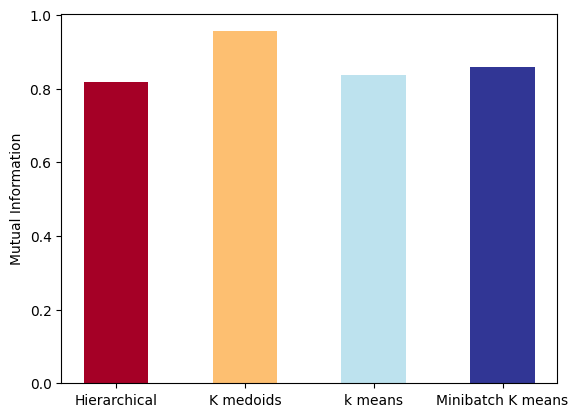

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Define the colormap
cmap = plt.get_cmap('RdYlBu')

mutual_informations = []
mutual_informations_vec = []
labels = []
for method_, cluster_ in zip(methods, predicted_clusters):
    mi = calculate_mi_on_groups(cluster_, labels_list_test, 43, 21)
    mutual_informations.append(np.mean(mi))
    mutual_informations_vec.append(mi)
    labels.append(method_)
    print(f"mutual information between {method_} and the ground truth is {np.mean(mi)}")

# Plot the bar graph
fig, ax = plt.subplots()
bars = ax.bar(labels, mutual_informations, width=0.5, color=cmap(np.linspace(0, 1, len(mutual_informations))))

# Set the x-axis tick labels to be horizontal
ax.tick_params(axis='x', labelrotation=0, labelsize=10)

# Add labels and title
ax.set_ylabel('Mutual Information')

# Save the plot as a PNG image
plt.savefig('mutual_information_plot_gas.png', dpi=300, bbox_inches='tight')

plt.show()


In [26]:
#Anova test
from scipy.stats import f_oneway
# perform ANOVA test
t_statistic, p_value = f_oneway(*mutual_informations_vec)

print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))

t-statistic = 6.15, p-value = 5.40e-04 = 0.00054


In [27]:
from scipy.stats import ttest_ind

dueos = [(1,0), (1,2), (1,3)]
for i, j in dueos:
    # perform t-test
    t_statistic, p_value = ttest_ind(mutual_informations_vec[i], mutual_informations_vec[j])

    # print the result
    print(f"t test between {methods[i]} and {methods[j]}")
    print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))
    print(" ")


t test between K medoids and Hierarchical
t-statistic = 4.08, p-value = 1.02e-04 = 0.00010
 
t test between K medoids and k means
t-statistic = 3.44, p-value = 8.95e-04 = 0.00089
 
t test between K medoids and Minibatch K means
t-statistic = 2.69, p-value = 8.73e-03 = 0.00873
 


t test between K medoids and Heirarchical clustering
t-statistic = nan, p-value = nan = nan
 
t test between K medoids and K means
t-statistic = nan, p-value = nan = nan
 
t test between K medoids and Minibatch K means
t-statistic = nan, p-value = nan = nan
 


C:\Users\yuval\AppData\Local\Temp\ipykernel_17112\4038866987.py:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = ttest_ind(mutual_informations[i], mutual_informations[j])
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


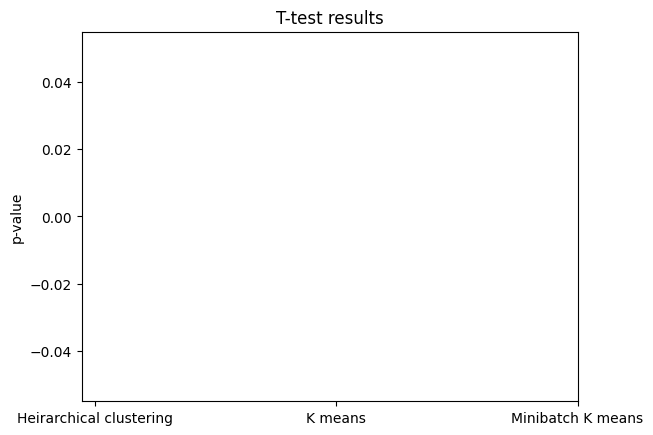

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

dueos = [(1,0), (1,2), (1,3)]

p_values = []
methods = ["Heirarchical clustering", "K medoids", "K means", "Minibatch K means"]

for i, j in dueos:
    # perform t-test
    t_statistic, p_value = ttest_ind(mutual_informations[i], mutual_informations[j])

    # add p-value to list
    p_values.append(p_value)

    # print the result
    print(f"t test between {methods[i]} and {methods[j]}")
    print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))
    print(" ")


**based on the statistical test, the best clustering model is _K medoids_**

## Annomaly Detection

### Perform the annomaly detection

In [29]:
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [30]:
#LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.3)
y_pred_lof = lof.fit_predict(X_train)
y_pred_lof
y_pred_lof_test = lof.fit_predict(X_test)

In [31]:
#Isolation Forest
isolation_forest = IsolationForest(n_estimators=500, contamination=0.01)
y_pred_if = isolation_forest.fit_predict(X_train)
y_pred_if
y_pred_if_test = isolation_forest.fit_predict(X_test)

In [32]:
#One-Class SVM
one_class_svm = OneClassSVM(kernel='rbf', nu=0.01)
one_class_svm.fit(X_train)
y_pred_ocsvm = one_class_svm.predict(X_train)
y_pred_ocsvm
y_pred_ocsvm_test = one_class_svm.predict(X_test)

In [33]:
# Print the number of anomalies
print("LOF detected", np.sum(y_pred_lof == -1), "anomalies")
print("LOF detected on the test set", np.sum(y_pred_lof_test == -1), "anomalies")
print("Isolation Forest detected", np.sum(y_pred_if == -1), "anomalies")
print("Isolation Forest detected on the test set", np.sum(y_pred_if_test == -1), "anomalies")
print("One-Class SVM detected", np.sum(y_pred_ocsvm == -1), "anomalies")
print("One-Class SVM detected on the test set", np.sum(y_pred_ocsvm_test == -1), "anomalies")

LOF detected 813 anomalies
LOF detected on the test set 271 anomalies
Isolation Forest detected 28 anomalies
Isolation Forest detected on the test set 10 anomalies
One-Class SVM detected 26 anomalies
One-Class SVM detected on the test set 5 anomalies


In [34]:
len(labels_list_train)

2709

### Find best algorithems based on the improvment in the clustering

In [1]:
mutual_information_ad = []
methods_ad = [y_pred_lof, y_pred_if, y_pred_ocsvm]
names = ["LOF", "Isolation Forest", "One Class SVM"]

for i, anom, name, rg in zip(range(1,4), methods_ad, names, [(29, 28), (29, 28), (41, 20)]):
    X_train_clean = X_train[anom != -1]
    kmedoids = KMedoids(n_clusters=k, metric='euclidean').fit(X_train_clean)
    clusters_kmedoids = kmedoids.predict(X_train_clean)

    mutual_information_ad.append(calculate_mi_on_groups(clusters_kmedoids, np.array(labels_list_train)[anom != -1], rg[0], rg[1]))

NameError: name 'y_pred_lof' is not defined

In [37]:
for name, score in zip(names, mutual_information_ad):
    print(f"mutual information between {name} and the ground truth is {np.mean(score)}")

mutual information between LOF and the ground truth is 0.9045066787031134
mutual information between Isolation Forest and the ground truth is 0.9817749673896651
mutual information between One Class SVM and the ground truth is 0.909835575103278


In [38]:
#Anova test
from scipy.stats import f_oneway
# perform ANOVA test
t_statistic, p_value = f_oneway(*mutual_information_ad)

print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))

t-statistic = 2.25, p-value = 1.11e-01 = 0.11058


In [39]:
from scipy.stats import ttest_ind

dueos = [(0,2), (0,1), (1,2)]
for i, j in dueos:
    # perform t-test
    t_statistic, p_value = ttest_ind(mutual_informations[i], mutual_informations[j])

    # print the result
    print(f"t test between {names[i]} and {names[j]}")
    print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))
    print(" ")

t test between LOF and One Class SVM
t-statistic = nan, p-value = nan = nan
 
t test between LOF and Isolation Forest
t-statistic = nan, p-value = nan = nan
 
t test between Isolation Forest and One Class SVM
t-statistic = nan, p-value = nan = nan
 


C:\Users\yuval\AppData\Local\Temp\ipykernel_17112\3590118846.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = ttest_ind(mutual_informations[i], mutual_informations[j])
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


**based on the statistical test, the _IF_ is the best algorithem**


### Check if there is an improvment in the clustering with LOF

In [40]:
#train the with AD model
X_test_clean = X_test[y_pred_lof_test != -1]
kmedoids_ad = KMedoids(n_clusters=k, metric='euclidean')
kmedoids_ad.fit(X_train)
clusters_ad = kmedoids.predict(X_test_clean)

count = 0
clusters_with_anomalys = []
for i in range(0, len(X_test)):
    if y_pred_lof_test[i] == -1:
        clusters_with_anomalys.append(-1)
        count+=1
    else:
        clusters_with_anomalys.append(clusters_ad[i-count])
    
print(f"mutual information between WITH AD and the ground truth is {np.mean(calculate_mi_on_groups(clusters_with_anomalys, labels_list_test, 43, 21))}")

#train the no AD model
kmedoids_no_ad = KMedoids(n_clusters=k, metric='euclidean')
kmedoids_no_ad.fit(X_train)
clusters_no_ad = kmedoids.predict(X_test)

print(f"mutual information between NO AD and the ground truth is {np.mean(calculate_mi_on_groups(clusters_no_ad, labels_list_test, 43, 21))}")


mutual information between WITH AD and the ground truth is 0.8400488398061898
mutual information between NO AD and the ground truth is 0.8986855616285595


In [41]:
from scipy.stats import ttest_ind

# perform t-test
t_statistic, p_value = ttest_ind(calculate_mi_on_groups(clusters_with_anomalys, labels_list_test, 43, 21), calculate_mi_on_groups(clusters_no_ad, labels_list_test, 43, 21))

# print the result
print(f"t test between WITH AD and NO AD")
print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))


t test between WITH AD and NO AD
t-statistic = -1.65, p-value = 1.03e-01 = 0.10325


**based on the statistical test, the IF _does not_ improve the clustering**

## PLOTS

In [46]:
def plot_clusters(points, true_labels, centroids, model_labels):
    fig, ax = plt.subplots(1, figsize=(6,6))
    # plot data
    plt.scatter(points[:, 0], points[:, 1], c=get_colors_model(model_labels), alpha=0.5, s=80)

    # plot true labels
    plt.scatter(points[:, 0], points[:, 1], c=get_colors_true(true_labels),alpha=1, s=1)

    # plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='black', s=100)

#     # legend
#     legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1),
#                                    markerfacecolor=get_colors([i+1])[0], markersize=5) for i in range(len(set(true_labels)))]
#     plt.legend(handles=legend_elements, loc='upper right', ncol=2)

    # set x and y limits
    x_min, x_max = points[:, 0].min(), points[:, 0].max()
    y_min, y_max = points[:, 1].min(), points[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    plt.xlim(x_min - 0.1 * x_range, x_max + 0.1 * x_range)
    plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)

    # title and labels
    plt.xlabel('TSNE D1')
    plt.ylabel('TSNE D2')

    plt.show()

In [47]:
def get_colors_model(labels):
    colors = []
    colors_dict = {1:"fuchsia", 2:"olive",3:"red",4:"brown",5:"blue",6:"purple"}
    for label in labels:
        colors.append(colors_dict[label])
    return colors

def get_colors_true(labels):
    colors = []
    colors_dict = {1:"darkorchid", 2:"green",3:"khaki",4:"cyan",5:"orange",6:"pink"}
    for label in labels:
        colors.append(colors_dict[label])
    return colors

In [48]:
def replace_labels(labels_list_test, A):
    for i in range(len(labels_list_test)):
        labels_list_test[i] = A[labels_list_test[i]%len(A)]
    return labels_list_test

In [49]:
from itertools import permutations

def generate_lists():
    all_lists = []
    for perm in permutations([1, 2, 3, 4, 5, 6]):
        all_lists.append(list(perm))
    return all_lists

lists = generate_lists()
print(len(lists))

720


In [50]:
from sklearn.metrics import accuracy_score

for x in lists:
    accuracy = accuracy_score(replace_labels(labels_list_test,x), clusters_no_ad)
    
    if 0.44 <= accuracy:
        print("Accuracy score: ", accuracy, " x: ", x)

(904, 2)


C:\Users\yuval\AppData\Local\Temp\ipykernel_17112\1877232846.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  new_cmap = plt.cm.get_cmap(cmap, len(unique_colors))


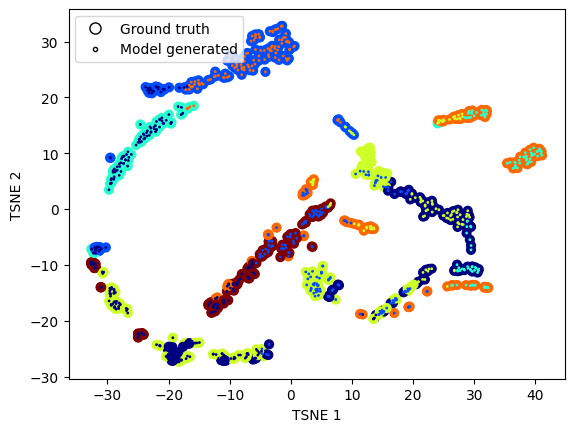

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#KMedoids
kmedoids = KMedoids(n_clusters=k, metric='euclidean')
kmedoids.fit(X_train)
clusters_kmedoids = kmedoids.predict(X_test)

tsne = TSNE(n_components=2)
X_test_tsne = tsne.fit_transform(X_test)
print(X_test_tsne.shape)

cmap = "jet"
l = 904
normalize = plt.Normalize(vmin=np.min(y_test["Gas"]), vmax=np.max(y_test["Gas"]))

# Plot the data points with labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=[int(x) for x in list(y_test[0:l]["Gas"])], cmap=cmap, norm=normalize, s=40, label='Ground truth')

# Plot the data points with cluster labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=clusters_kmedoids[0:l], cmap=cmap, norm=normalize, s=1, label='Model generated')

# Get the unique colors used in the plot
unique_colors = np.unique(clusters_kmedoids[0:l])

# Create a new color map using only the unique colors
new_cmap = plt.cm.get_cmap(cmap, len(unique_colors))


# Create empty proxy artists for the legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Ground truth', markerfacecolor='none', markersize=8, markeredgecolor='k'),
                   Line2D([0], [0], marker='o', color='w', label='Model generated', markerfacecolor='none', markersize=3, markeredgecolor='k')]

# Add legend with labels and no fill color
plt.legend(handles=legend_elements, loc='upper left')

# Add labels and title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.savefig(f'gas_resualts_plot_{cmap}.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.neighbors import LocalOutlierFactor

def plot_lof_anomalies(data):
    # Fit the LOF model to the data
    lof = LocalOutlierFactor(n_neighbors=20)
    y_pred = lof.fit_predict(data)
    scores = -lof.negative_outlier_factor_

    # Scale the scores to the range [0, 1]
    scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))

    # Count the number of points in each score bin
    bins = np.linspace(0, 1, num=100)
    hist, _ = np.histogram(scores, bins=bins)

    # Plot the anomaly score histogram as a bar plot
    plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]), align='edge', color=cm.Accent(0.5), edgecolor='black')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Number of Points')
    
    # Add a black dashed line at the 10% mark
    percentile_1 = np.percentile(scores, 99)
    percentile_10 = np.percentile(scores, 90)
    plt.axvline(x=percentile_1, linestyle='--', color="red", label="1%")
    plt.axvline(x=percentile_10, linestyle='--', color='fuchsia', label="10%")
    
    plt.legend()
    
    plt.savefig("AD_plot_gas.png", dpi=300, bbox_inches='tight')
    plt.show()


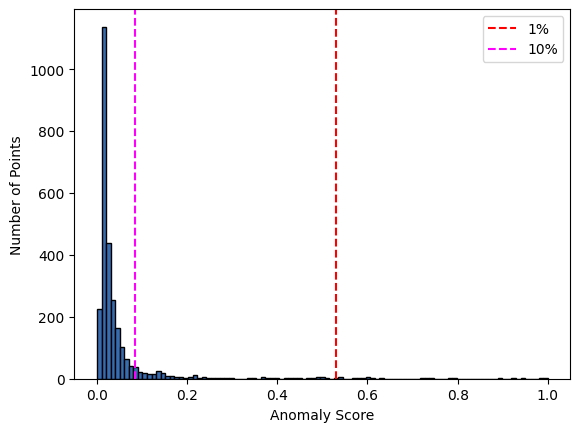

In [56]:
plot_lof_anomalies(X_train)

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn_extra.cluster import KMedoids
from matplotlib.colors import ListedColormap

def k_medoids_silhouette(data, labels, k):
    # Create KMedoids model with k clusters
    model = KMedoids(n_clusters=k, random_state=42)
    model.fit(data)
    
    # Get cluster labels and compute silhouette scores
    cluster_labels = model.labels_
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_values = silhouette_samples(data, cluster_labels)
    
    # Set up colormap and plot silhouette scores
    cmap = ListedColormap(plt.cm.RdYlBu(np.linspace(0, 1, k)))
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cmap(i)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        y_lower = y_upper + 10
    
    plt.yticks([])
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.savefig("Silhouette_plot_gas.png", dpi=300, bbox_inches='tight')
    plt.show()


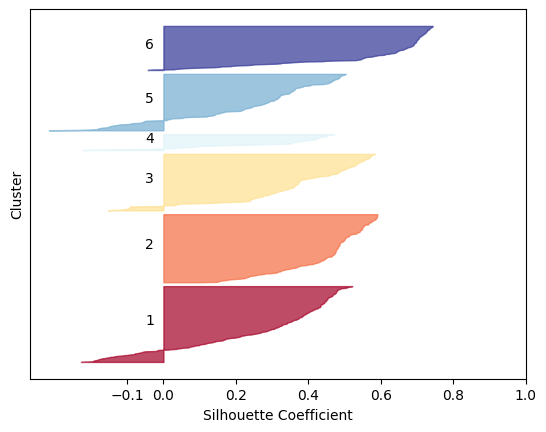

In [70]:
k_medoids_silhouette(X_test, y_test, 6)